In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# overfitting

In [4]:
x=np.random.rand(6)
y=np.random.rand(6)

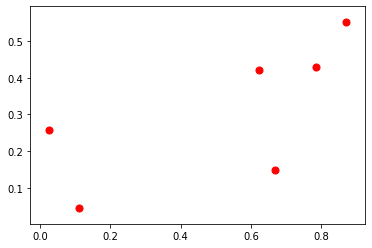

In [6]:
plt.scatter(x,y,c='r',s=50)

In [7]:
def myplot(n=1):
    plt.scatter(x,y,c='r',s=50)
    t=np.linspace(-0.2,1.2,1000)
    plt.plot(t,0.5*np.sin(n*t)+0.5)

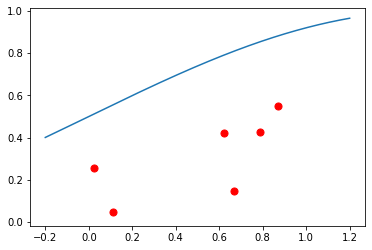

In [8]:
myplot()

In [10]:
from ipywidgets import interact

In [11]:
interact(myplot,n=(1,200))

interactive(children=(IntSlider(value=1, description='n', max=200, min=1), Output()), _dom_classes=('widget-in…

<function __main__.myplot(n=1)>

# 線性迴歸
$$f(x)=1.2x+0.8+\varepsilon$$

In [16]:
x=np.linspace(0,5,200)
y=1.2*x+0.8+0.3*np.random.randn(200)

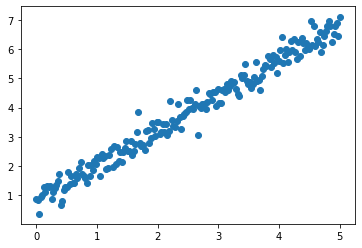

In [17]:
plt.scatter(x,y)

# 分訓練資料和測試資料

In [18]:
from sklearn.model_selection import train_test_split

### 小重點
機器學習(數據分析),輸入資料是
$$[x_1,x_2,x_3,...]$$
喜歡放成
$$[[x_1],[x_2],[x_3],...]$$
意思就是說本來n維向量,要變成nx1

In [21]:
x.shape

(200,)

In [22]:
x=x.reshape(200,1)

In [31]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=0)

In [32]:
len(x_train)

160

In [33]:
len(x_test)

40

# 準備做線性迴歸
所有函數學習,包括線性迴歸、機器學習、神經網路都是做三部曲:
    1. 開一台函數學習機
    2. 訓練
    3. 預測

### step 1. 建函數學習機

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model=LinearRegression()

### step 2. 學習 (訓練)

In [37]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### step 3. 預測

In [38]:
model.predict([[10]])

array([12.81145949])

In [39]:
model.predict([[10],[5]])

array([12.81145949,  6.82980901])

In [41]:
y_predict=model.predict(x_test)

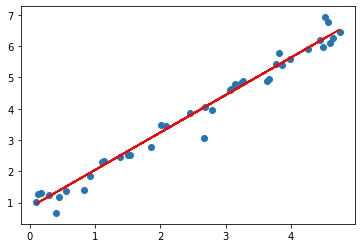

In [42]:
plt.scatter(x_test.ravel(),y_test)
plt.plot(x_test.ravel(),y_predict,'r')

# 房價預測

In [43]:
from sklearn.datasets import load_boston

In [44]:
boston_dataset=load_boston()

In [45]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [46]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [47]:
len(boston_dataset.feature_names)

13

In [49]:
boston_dataset.data[:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [50]:
boston=pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)

In [51]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [53]:
boston['MEDV']=boston_dataset.target

In [54]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [56]:
import seaborn as sns
#把matplotlib變漂亮

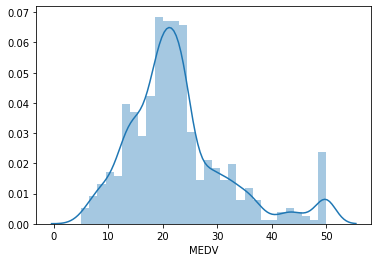

In [57]:
sns.distplot(boston.MEDV,bins=30)

# 準備訓練資料

In [58]:
X=boston.loc[:,"CRIM":"LSTAT"].values
Y=boston.MEDV

In [59]:
X[:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [60]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.2 , random_state=0)

In [61]:
len(x_train)

404

In [62]:
len(x_test)

102

# 數據分析三部曲
### step 1. 開函數學習機


In [63]:
model=LinearRegression()

### step 2. 訓練

In [64]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### step 3. 預測

In [65]:
y_predict=model.predict(x_test)

In [70]:
sns.set()

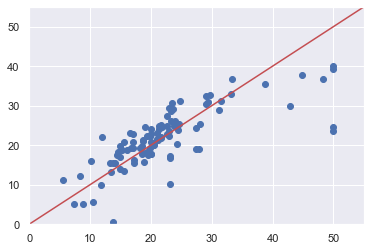

In [72]:
plt.scatter(y_test,y_predict)
plt.xlim(0,55)
plt.ylim(0,55)
plt.plot([0,55],[0,55],'r')

#### [指定作業]
房價資料不用所有的feature去預測。

In [74]:
x_train[87]

array([  5.58107,   0.     ,  18.1    ,   0.     ,   0.713  ,   6.436  ,
        87.9    ,   2.3158 ,  24.     , 666.     ,  20.2    , 100.19   ,
        16.22   ])

In [83]:
correlation_matrix=boston.corr().round(2)

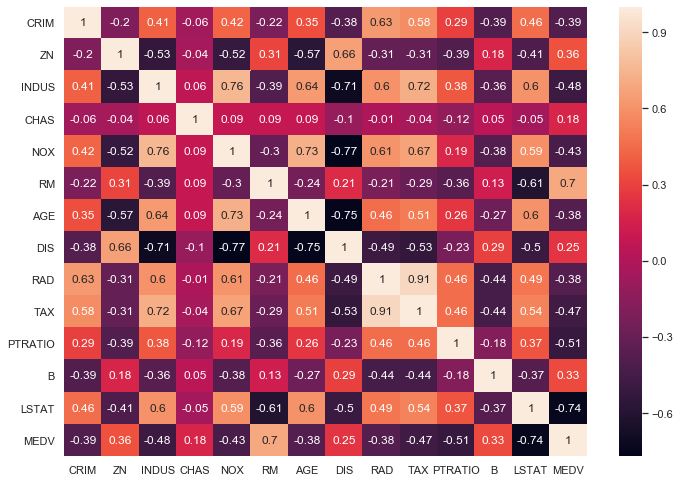

In [85]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(correlation_matrix,annot=True)